## Chapter 16 영상인식

### CIFAR-10: CNN - P.480

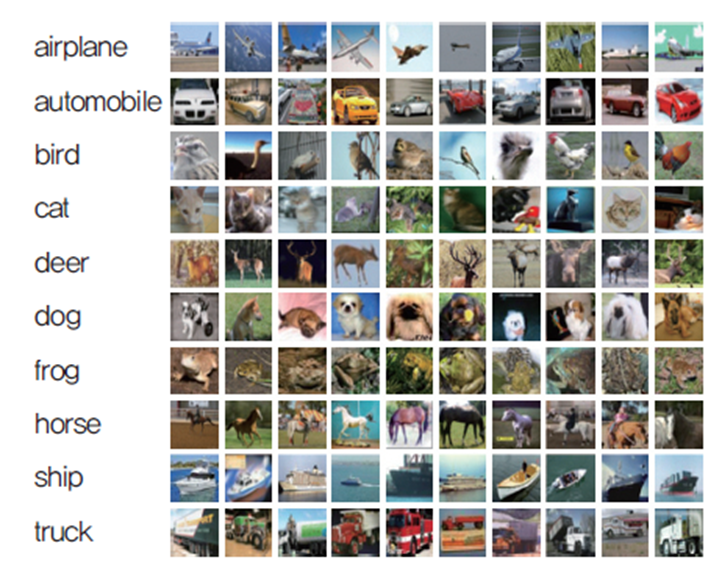

In [ ]:
classes = {0: 'airplane', 
           1: 'automobile', 
           2: 'bird', 
           3: 'cat', 
           4: 'deer', 
           5: 'dog', 
           6: 'frog', 
           7: 'horse', 
           8: 'ship', 
           9: 'truck'
        }

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Callbacks 추가
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# CFAR-10 데이터 세트를 적재
# 훈련 세트와 테스트 세트를 반환
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

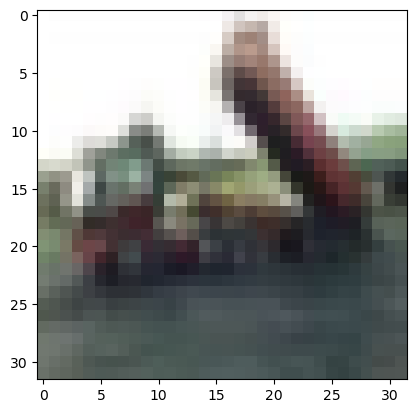

In [2]:
plt.imshow(X_train[2])
plt.show()

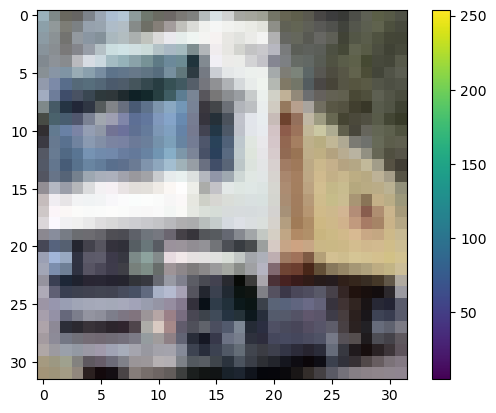

In [3]:
# 두 번째 영상(트럭)을 화면에 표시
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# 영상의 픽셀값을 0에서 1사이로 변환
X_train = X_train / 255.0
X_test = X_test / 255.0

**신경망 모델 구축**

In [5]:
# 순차 모델을 구축
model = Sequential()
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, activation='relu', kernel_size=(3, 3)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**신경망 모델 컴파일**

In [6]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 훈련 
# verbose: 훈련 진행 상황 표시
# 0: 훈련 진행 상황 표시 X 
# 1: 훈련이 진행되는 과정 표시(진행 막대, 손실, 정확도 실시간 표시)
# 2: 진행 막대는 보여주지 않고 매 에포크마다 훈련 손실과 정확도 결과만 보여줌

# validation_split: 검증 데이터로 사용할 비율 지정
# 0.3: 훈련 데이터의 30%를 검증 데이터로 따로 떼어내서 모델을 훈련시키는 동안 모델의 성능 평가함
# 모델은 이 검증 데이터로 훈련하지 않고 오직 평가만 이뤄짐
# 이렇게 하는 이유는 과적합 방지
history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    verbose=1, 
                    validation_split=0.3
                    )

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4557 - loss: 1.5151 - val_accuracy: 0.5533 - val_loss: 1.2715
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.5899 - loss: 1.1570 - val_accuracy: 0.6147 - val_loss: 1.0958
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6451 - loss: 1.0112 - val_accuracy: 0.6280 - val_loss: 1.0654
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.6814 - loss: 0.9038 - val_accuracy: 0.6281 - val_loss: 1.0711
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.7137 - loss: 0.8115 - val_accuracy: 0.6581 - val_loss: 1.0064
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7431 - loss: 0.7307 - val_accuracy: 0.6579 - val_loss: 1.0189
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7665 - loss: 0.6581 - val_accuracy: 0.6561 - val_loss: 1.0709
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.7920 -

**손실값 그래프로 시각화**

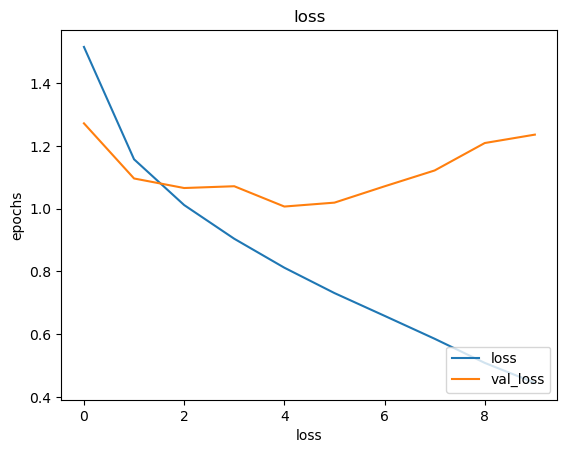

In [8]:
# 손실값을 그래프로 그림
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

**테스트**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
정답= [3]
예측값= [2.2791940e-04 3.7504238e-04 3.8815665e-03 3.1589240e-01 1.6693318e-04
 1.3419627e-01 5.7209316e-03 8.5844276e-06 5.3607321e-01 3.4571600e-03]


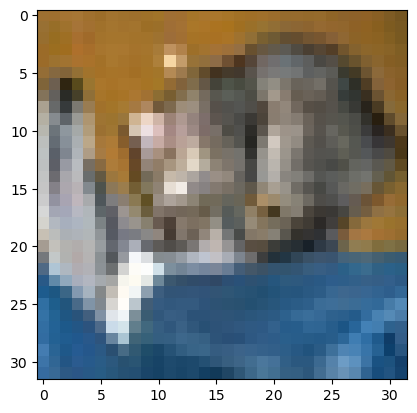

In [9]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])